# Árvores de regressão - parte 2

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


In [247]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [249]:
# Carregando o banco de dados

df = pd.read_csv('housing.csv')
print(df.shape)
df.head()

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [250]:
# Informações dos dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [251]:
# Removendo dados faltantes 
# Correspondem a uma pequena fração do dataset

df.dropna(inplace=True)
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [252]:
# Criando categorias dummy
# Somente a variável "ocean_proximity" será afetada

df2 = pd.get_dummies(df).copy()

In [253]:
# O dataset

print(df2.shape)
df2

(20433, 14)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


In [254]:
# Separando o banco de dados em Target
# sendo a variável 'median_house_value'

y = df2.median_house_value
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [255]:
# Variáveis explicativas

X = df2.drop(columns=['median_house_value', 'longitude', 'latitude']).copy()
print(X.shape)
X

(20433, 11)


,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,False,True,False
1,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,False,True,False
2,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,False,True,False
3,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,False,True,False
4,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
20635,25.0,1665.0,374.0,845.0,330.0,1.5603,False,True,False,False,False
20636,18.0,697.0,150.0,356.0,114.0,2.5568,False,True,False,False,False
20637,17.0,2254.0,485.0,1007.0,433.0,1.7000,False,True,False,False,False
20638,18.0,1860.0,409.0,741.0,349.0,1.8672,False,True,False,False,False


In [256]:
# Separando a base em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=100)

In [257]:
# Avaliando o shape dos dados 

print(X_train.shape) # 70% dos dados 
print(X_test.shape) # 30% dos dados
print(y_train.shape)
print(y_test.shape)

(14303, 11)
(6130, 11)
(14303,)
(6130,)


In [258]:
# Criando os modelos

tree_reg = DecisionTreeRegressor(max_depth=6, min_samples_leaf=25)

In [259]:
# Treinando o modelo

tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=25)

Text(0.5, 1.0, 'Visualização da árvore')

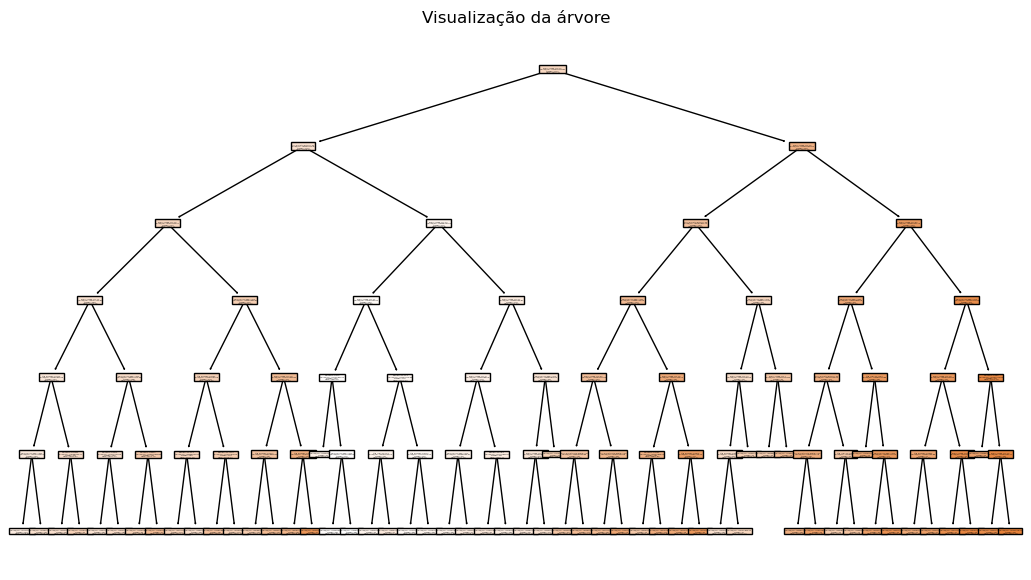

In [260]:
# Visualização 

plt.figure(figsize=[13,7])
tree.plot_tree(
    tree_reg,
    filled=True,
    feature_names=X.columns
)
plt.title('Visualização da árvore')

In [261]:
# Verificando a capacidade de explicar a variância dos dados

tree_reg.score(X_train, y_train)

0.6519220678899713

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [263]:
# Verificando os dados de ccp_alpha e impurities

path = tree_reg.cost_complexity_pruning_path(X_train, y_train)
path

{'ccp_alphas': array([0.00000000e+00, 6.91843054e+05, 9.06710590e+05, 1.19524126e+06,
        1.28609669e+06, 1.91212662e+06, 2.19147452e+06, 2.89800156e+06,
        2.97850028e+06, 2.99528925e+06, 3.35634740e+06, 3.42967900e+06,
        4.94478286e+06, 5.10502162e+06, 5.51226047e+06, 5.56788782e+06,
        5.71360286e+06, 5.87144260e+06, 6.14692142e+06, 7.96175116e+06,
        8.52634473e+06, 8.71948769e+06, 8.80522617e+06, 9.69065780e+06,
        1.07634594e+07, 1.26835978e+07, 1.30503303e+07, 1.39559871e+07,
        1.72003654e+07, 1.76935931e+07, 1.83162707e+07, 1.83495183e+07,
        1.88140724e+07, 2.01233048e+07, 2.08825235e+07, 2.36432271e+07,
        2.40663934e+07, 3.18818211e+07, 3.28130860e+07, 3.61794984e+07,
        3.76943798e+07, 3.82671993e+07, 3.86436646e+07, 5.27864961e+07,
        6.60788114e+07, 7.15085498e+07, 8.57135692e+07, 1.47685750e+08,
        1.53985568e+08, 1.67883576e+08, 1.78121224e+08, 5.41911674e+08,
        7.65503246e+08, 1.68402635e+09, 4.13252772

Text(0.5, 1.0, 'Impurezas em função do alpha')

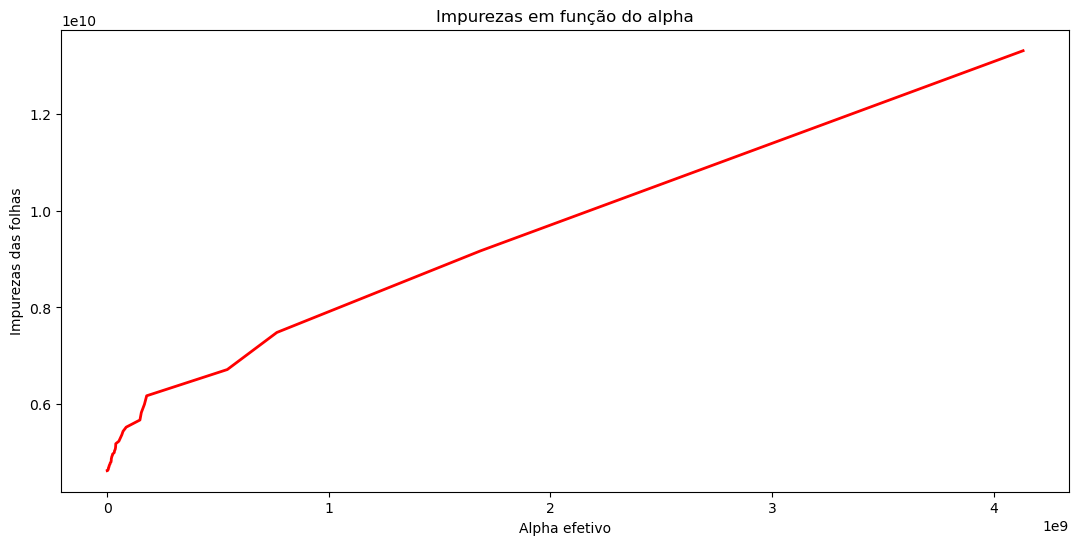

In [264]:
# Separando o ccp_alpha e as impurezas
ccp_alphas = path.ccp_alphas
impurities = path.impurities

# Visualização gráfica
plt.figure(figsize=[13,6])
plt.plot(ccp_alphas, impurities, lw=2, ls='-', color='red')
plt.xlabel('Alpha efetivo')
plt.ylabel('Impurezas das folhas')
plt.title('Impurezas em função do alpha')

### 3. Para cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [266]:
# Gerando novas árvores com os alphas obtidos

clf_tree = [] # lista contendo as árvores

for ccp_alpha in ccp_alphas:
    # Novas árvores
    new_tree = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    new_tree.fit(X_train, y_train)
    clf_tree.append(new_tree)    

In [267]:
# Número de elementos na lista
len(clf_tree)

55

Text(0.5, 1.0, 'Tree depth as a function of effective alpha')

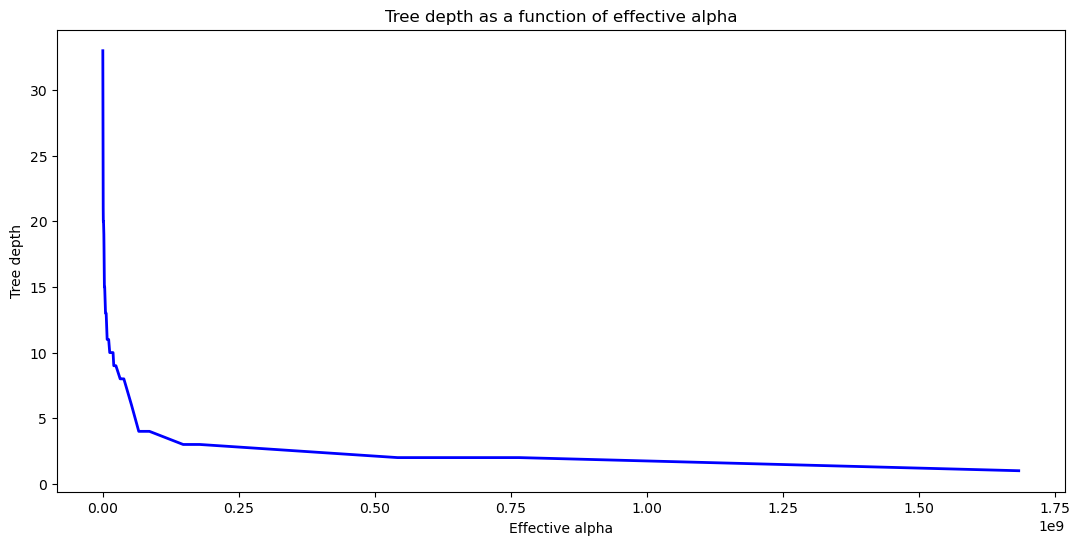

In [268]:
# Profundidade das árvores em função do alpha
tree_depths = [clf.tree_.max_depth for clf in clf_tree]

# Visualização gráfica
plt.figure(figsize=(13,6))
plt.plot(ccp_alphas[:-1], tree_depths[:-1], lw=2, color='blue')
plt.xlabel('Effective alpha')
plt.ylabel('Tree depth')
plt.title('Tree depth as a function of effective alpha')

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [270]:
# Para o grupo de treino
mse_train = []
for clf in clf_tree:
    mse_train.append(mean_squared_error(y_train, clf.predict(X_train)))

# List comprehension para o teste
mse_test = [mean_squared_error(y_test, clf.predict(X_test)) for clf in clf_tree]

In [271]:
print('--> Para treino: {}'.format(mse_train))
print('--------------------------------')
print('--> Para teste: {}'.format(mse_test))

--> Para treino: [0.0, 1049956170.5231252, 1288734346.0321317, 1555925526.409876, 1651378155.7511024, 2114966770.100565, 2319408442.1579385, 2764563402.302664, 2796957748.4535756, 2808899547.400802, 2929738749.7132273, 2946704023.726366, 3455201549.9356327, 3500459520.21759, 3575050011.633628, 3580603712.704694, 3597574107.777696, 3626489648.915912, 3680565910.1952324, 4005662650.267953, 4038904292.7742047, 4047439595.8750024, 4047439595.8750024, 4085454871.1812634, 4134451798.158552, 4234839823.8607197, 4260531457.0621557, 4287048467.877693, 4423065612.115885, 4423065612.115885, 4441381882.777925, 4441381882.777925, 4478545473.531403, 4497889749.99151, 4518013054.771902, 4606726325.107193, 4606726325.107193, 4874605282.269032, 4907418368.270795, 4907418368.270795, 4981292246.5489645, 4981292246.5489645, 5058203110.395281, 5239816167.141255, 5371973789.957585, 5371973789.957585, 5529195908.885976, 5676881658.897548, 5676881658.897548, 5998750803.343516, 6176872027.467694, 6718783701.32

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

Text(0.5, 1.0, 'MSE x alpha do conjunto de dados de treino e teste')

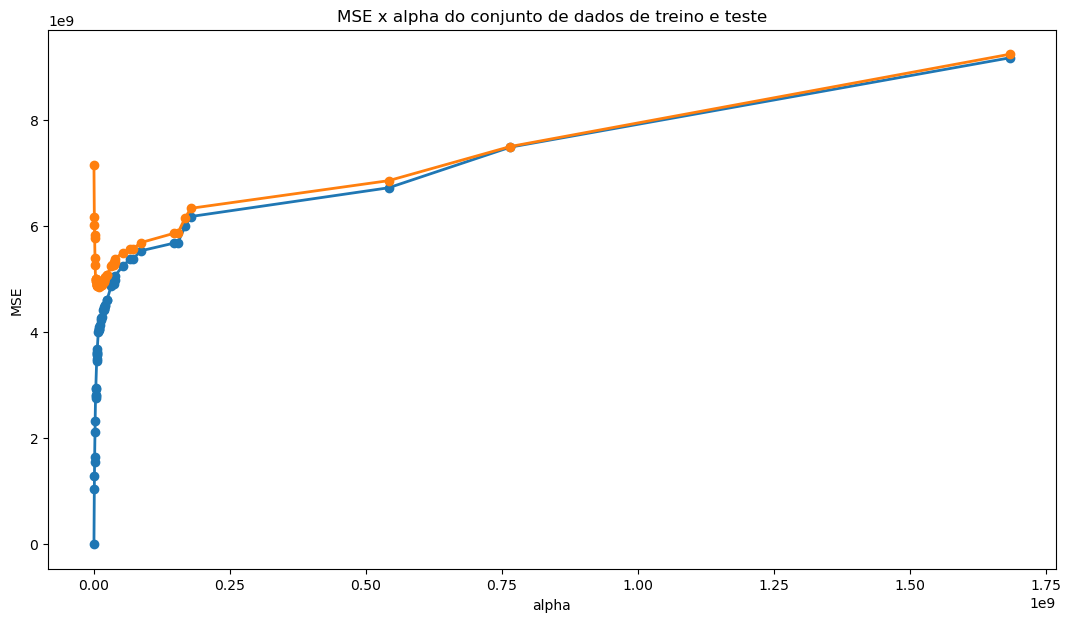

In [273]:
# Visualização gráfica

fig, ax = plt.subplots(figsize=[13,7])

ax.plot(ccp_alphas[:-1], mse_train[:-1], ls='-', lw=2, marker='o')
ax.plot(ccp_alphas[:-1], mse_test[:-1], ls='-', lw=2, marker='o')

ax.set_xlabel('alpha')
ax.set_ylabel('MSE')
ax.set_title('MSE x alpha do conjunto de dados de treino e teste')

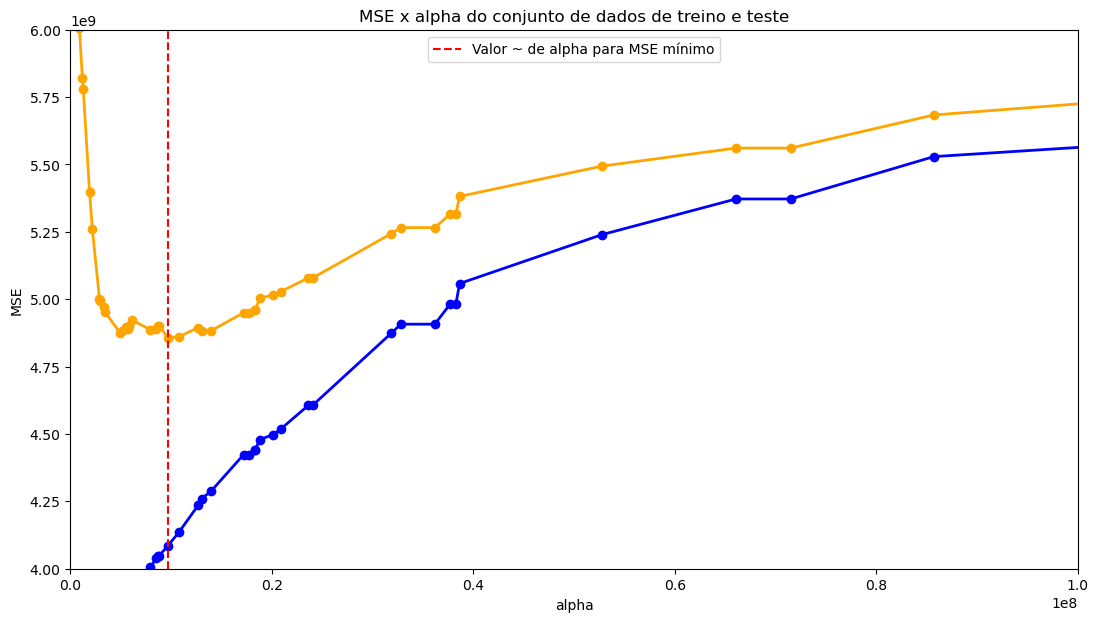

In [315]:
# Aplicando um "zoom" para identificar melhor o ponto de mínimo MSE

fig, ax = plt.subplots(figsize=[13,7])

ax.plot(ccp_alphas[:-1], mse_train[:-1], ls='-', lw=2, marker='o', color='blue')
ax.plot(ccp_alphas[:-1], mse_test[:-1], ls='-', lw=2, marker='o', color='orange')

ax.set_xlabel('alpha')
ax.set_ylabel('MSE')
ax.set_title('MSE x alpha do conjunto de dados de treino e teste')

# Definindo os limites nos eixos (o 'zoom')
ax.set(xlim=(0, 1 * 10**8))
ax.set(ylim=[4*10**9, 6*10**9])
ax.axvline(9.7*10**6, color='r', ls='--', label='Valor ~ de alpha para MSE mínimo')
plt.legend(loc='upper center')

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [276]:
# Com base no ccp_alpha definido pela linha vertical no painel anterior

final_tree = DecisionTreeRegressor(random_state=0, ccp_alpha=9.7*10**6)
final_tree.fit(X_train, y_train)

print('--> Profundidade {}'.format(final_tree.tree_.max_depth))
print('--> R-quadrado na base de testes: {}'.format(final_tree.score(X_test, y_test)))
print('--> MSE na base de testes: {:.2f}'.format(mean_squared_error(y_test, final_tree.predict(X_test))))

--> Profundidade 11
--> R-quadrado na base de testes: 0.6369521754115051
--> MSE na base de testes: 4857757648.85


### 7. Visualize esta árvore.

Text(0.5, 1.0, 'Final tree')

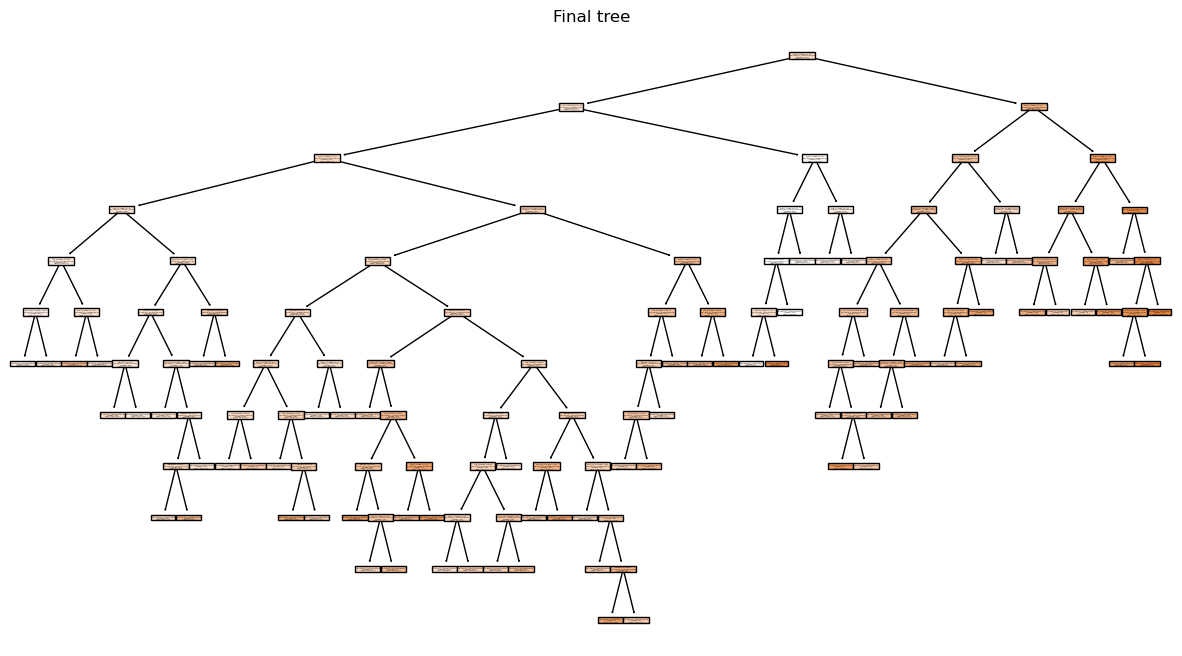

In [278]:
plt.figure(figsize=[15,8])
tree.plot_tree(
    final_tree,
    feature_names=X.columns,
    filled=True
)
plt.title('Final tree')